This code imports necessary libraries for image processing and clustering analysis using scikit-learn.

    cv2 is the OpenCV library for computer vision and image processing.
    matplotlib.pyplot is a plotting library for visualizing images and segmentation.
    numpy is a library for scientific computing and array operations.
    sklearn.cluster is a module from scikit-learn that provides clustering algorithms.

Overall, this code sets up the necessary tools for image segmentation using clustering algorithms.

### Imports

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from sklearn import cluster

### MAIN ALGORITHM

In [2]:
def locatePattern(imagePath, templatePath= 'template.jpg'):
    
    # Read in the image and the template
    image = cv2.imread(imagePath, cv2.IMREAD_GRAYSCALE)
    template = cv2.imread(templatePath, cv2.IMREAD_GRAYSCALE)

    # Make sure the image and template were read successfully
    assert image is not None, "image file could not be read, check with os.path.exists()"
    assert template is not None, "template file could not be read, check with os.path.exists()"

    # Match the template to the image using cv2.matchTemplate()
    img = cv2.matchTemplate(image, template, cv2.TM_CCOEFF)
    
    # Normalize the result to be between 0 and 1
    img = (img - img.min()) / (img.max() - img.min())
    
    # Threshold the image to only keep values above a certain threshold
    img = img * (0.7 < img)
    
    # Cluster the remaining points to find the locations of the pattern
    cor = np.dstack(np.unravel_index(np.flip(img.ravel().argsort()), img.shape)) + np.array(template.shape) / 2
    cor = cor[0,:1000] 
    cor = cluster.KMeans(n_clusters= 8, n_init= 10).fit(cor).cluster_centers_.astype(int)

    # Return the coordinates of the clustered points
    return cor


def drawPoints(imagePath, cordinates):
    # Read in the image
    image = cv2.imread(imagePath, cv2.IMREAD_GRAYSCALE)

    # Make sure the image was read successfully
    assert image is not None, "image file could not be read, check with os.path.exists()"

    # Set up colors and legends for plotting
    colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'violet', 'black']
    legends = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8']

    # Plot the image and scatter the points on top of it
    plt.figure(figsize=[20, 15])
    plt.imshow(image, cmap='gray')
    
    for c, (y, x) in zip(colors, cordinates):
        plt.scatter(y=y, x=x, c=c)

    # Add a legend and show the plot
    plt.legend(legends)
    plt.show()


In [3]:
# Set the path to the input image and the template image
imagePath = './Test Photos/Test Photos/Phototaking/39.jpg'  # path to the input image
templatePath = 'template.jpg'  # path to the template image


In [4]:
# Call the locatePattern function to find the coordinates of the pattern in the image
cordinates = locatePattern(imagePath=imagePath)

# Print the coordinates to the console
print(cordinates)


[[513  85]
 [516 205]
 [454 147]
 [580 138]
 [586 262]
 [506  92]
 [572 144]
 [450 156]]


### Function Call 

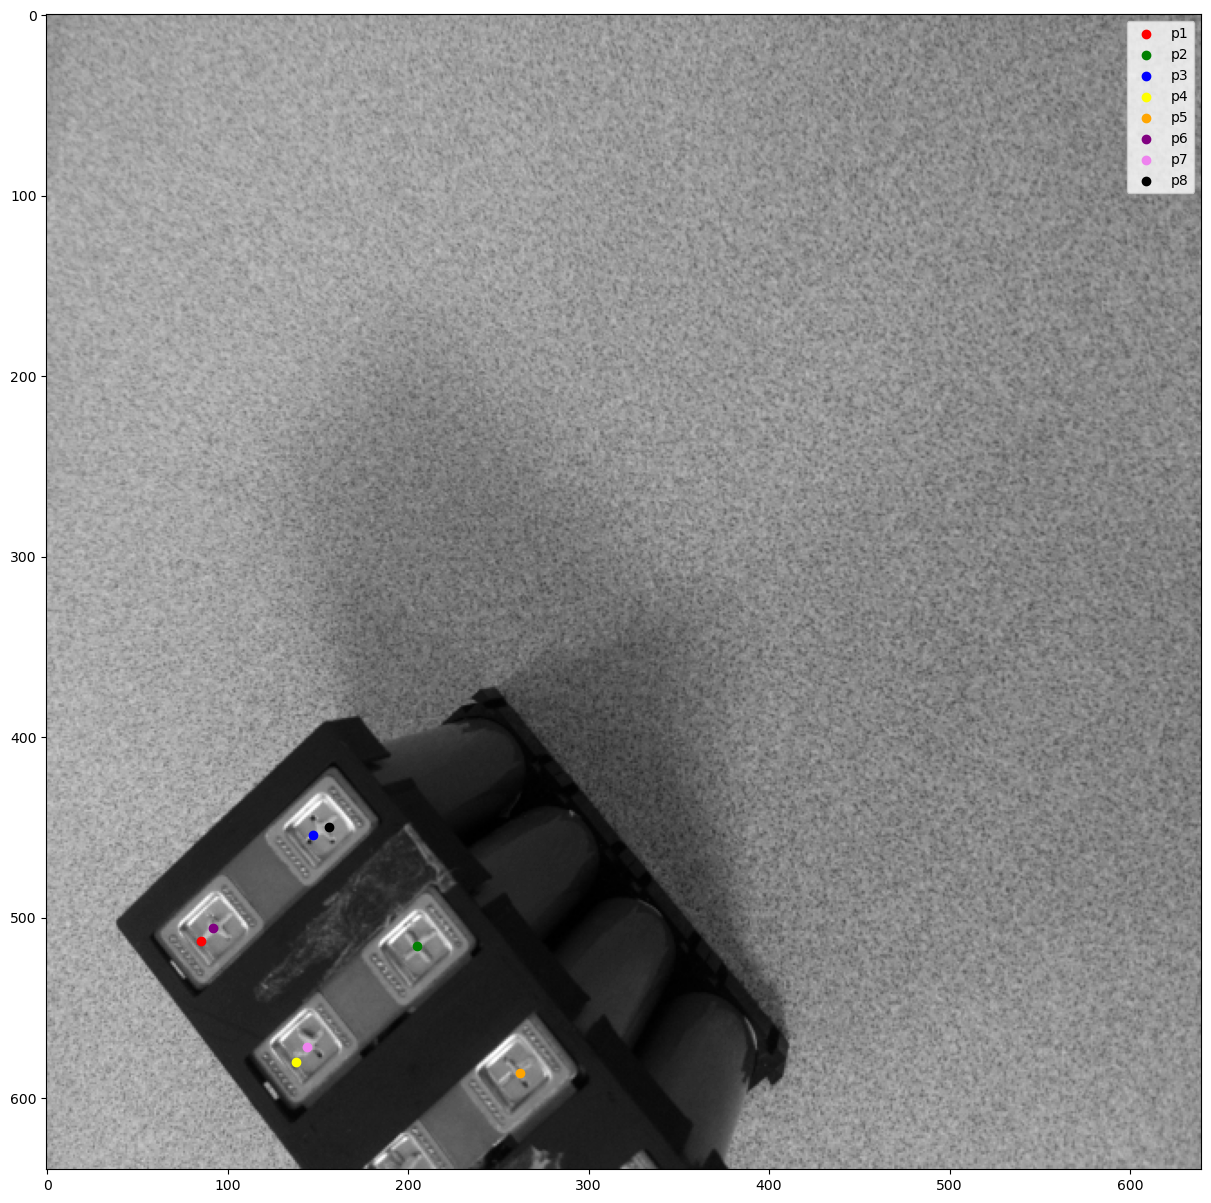

In [5]:
# Call the drawPoints function to plot the coordinates on the input image
drawPoints(imagePath=imagePath, cordinates=cordinates)
